In [0]:
##imports from libraries
import pandas as pd
import numpy as np
import time
import math  
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import matplotlib.cm as cm
#import resource
import time
from datetime import datetime
import math
import os
from sklearn import preprocessing
import sys
import cvxpy
from multiprocessing import Process, Pipe
from multiprocessing.pool import ThreadPool

## NOTE: Install keras --------------------------------------------------------------------
###------------------- keras imports for the dataset and neural network --------------------##
import keras
from keras.datasets import mnist
from keras.datasets import cifar10
from keras.models import Sequential, load_model
from keras.layers.core import Dense, Dropout, Activation
from keras.utils import np_utils
from keras import optimizers
from keras.layers.normalization import BatchNormalization
from keras import regularizers   

%matplotlib inline


Using TensorFlow backend.


In [0]:
image_size = 28
num_features = image_size * image_size
num_classes = 10

num_train = 49000

## Load MNIST Dataset

In [0]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

print('Train data shape: {}'.format(X_train.shape))
print('Test  data shape: {}'.format(X_test.shape))

Train data shape: (60000, 28, 28)
Test  data shape: (10000, 28, 28)


## Data Preprocessing

In [0]:
# Convert 3D arrays to 2D arrays
X_train =  X_train.reshape([-1, num_features])
X_test  =  X_test.reshape([-1, num_features])

print('Train data shape: {}'.format(X_train.shape))
print('Test  data shape: {}'.format(X_test.shape))

Train data shape: (60000, 784)
Test  data shape: (10000, 784)


In [0]:
# convert pixel range from [0, 255] to [0., 1.]
X_train = X_train.astype('float32')
x_test  = X_test.astype('float32')

mu = np.mean(X_train, axis=0)

X_train -= mu
X_train /= 255.0

x_test -= mu
x_test /= 255.0

## One-hot encodding
- We have 10 classes: 0, 1, ..., 9

In one-hot encoding, we represent labels using vectors.

```python
0: [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
1: [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
2: [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0]
.
.
.
9: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1]
```

In [0]:
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test  = keras.utils.to_categorical(y_test,  num_classes)

print(y_train.shape)
print(y_test.shape)

(60000, 10)
(10000, 10)


# Multi-layer Neural Network

### $$f(x) = W_{out} f\Bigg(W_8 f\Big(W_7 f\big(W_6 f(W_5 f(W_4 f(W_3  f(W_2  f(W_1 f(0, W_{in} x))))))\big)\Big)\Bigg)$$

### 8 heiden layers with 175 nerouns in each layers


In [0]:
model_0 = Sequential()
model_1 = Sequential()

n_p_layer = 175
droprate = 0
regparam = 0
# First hidden Layer)
model_0.add(Dropout(droprate, input_shape=(num_features,)))
model_0.add(Dense(units=n_p_layer, 
                input_shape=(num_features,),
                kernel_regularizer=regularizers.l1(regparam),
                bias_regularizer=regularizers.l1(regparam),
                activation='relu'))

model_0.add(Dropout(droprate, input_shape=(n_p_layer,)))
model_0.add(Dense(units=n_p_layer, 
                input_shape=(num_features,),
                kernel_regularizer=regularizers.l1(regparam),
                bias_regularizer=regularizers.l1(regparam),
                activation='relu'))

model_0.add(Dropout(droprate, input_shape=(n_p_layer,)))
model_0.add(Dense(units=n_p_layer, 
                input_shape=(num_features,),
                kernel_regularizer=regularizers.l1(regparam),
                bias_regularizer=regularizers.l1(regparam),
                activation='relu'))

model_0.add(Dropout(droprate, input_shape=(n_p_layer,)))
model_0.add(Dense(units=n_p_layer, 
                input_shape=(num_features,),
                kernel_regularizer=regularizers.l1(regparam),
                bias_regularizer=regularizers.l1(regparam),
                activation='relu'))

model_0.add(Dropout(droprate, input_shape=(n_p_layer,)))
model_0.add(Dense(units=n_p_layer, 
                input_shape=(num_features,),
                kernel_regularizer=regularizers.l1(regparam),
                bias_regularizer=regularizers.l1(regparam),
                activation='relu'))

model_0.add(Dropout(droprate, input_shape=(n_p_layer,)))
model_0.add(Dense(units=n_p_layer, 
                input_shape=(num_features,),
                kernel_regularizer=regularizers.l1(regparam),
                bias_regularizer=regularizers.l1(regparam),
                activation='relu'))

model_0.add(Dropout(droprate, input_shape=(n_p_layer,)))
model_0.add(Dense(units=n_p_layer, 
                input_shape=(num_features,),
                kernel_regularizer=regularizers.l1(regparam),
                bias_regularizer=regularizers.l1(regparam),
                activation='relu'))


# Output Layer
model_0.add(Dropout(0.2, input_shape=(n_p_layer,)))
model_0.add(Dense(units=num_classes, 
                activation='softmax',
                kernel_regularizer=regularizers.l1(regparam),
                bias_regularizer=regularizers.l1(regparam)))

# First hidden Layer)
model_1.add(Dropout(droprate, input_shape=(num_features,)))
model_1.add(Dense(units=n_p_layer, 
                input_shape=(num_features,),
                kernel_regularizer=regularizers.l1(regparam),
                bias_regularizer=regularizers.l1(regparam),
                activation='relu'))

model_1.add(Dropout(droprate, input_shape=(n_p_layer,)))
model_1.add(Dense(units=n_p_layer, 
                input_shape=(num_features,),
                kernel_regularizer=regularizers.l1(regparam),
                bias_regularizer=regularizers.l1(regparam),
                activation='relu'))

model_1.add(Dropout(droprate, input_shape=(n_p_layer,)))
model_1.add(Dense(units=n_p_layer, 
                input_shape=(num_features,),
                kernel_regularizer=regularizers.l1(regparam),
                bias_regularizer=regularizers.l1(regparam),
                activation='relu'))

model_1.add(Dropout(droprate, input_shape=(n_p_layer,)))
model_1.add(Dense(units=n_p_layer, 
                input_shape=(num_features,),
                kernel_regularizer=regularizers.l1(regparam),
                bias_regularizer=regularizers.l1(regparam),
                activation='relu'))

model_1.add(Dropout(droprate, input_shape=(n_p_layer,)))
model_1.add(Dense(units=n_p_layer, 
                input_shape=(num_features,),
                kernel_regularizer=regularizers.l1(regparam),
                bias_regularizer=regularizers.l1(regparam),
                activation='relu'))

model_1.add(Dropout(droprate, input_shape=(n_p_layer,)))
model_1.add(Dense(units=n_p_layer, 
                input_shape=(num_features,),
                kernel_regularizer=regularizers.l1(regparam),
                bias_regularizer=regularizers.l1(regparam),
                activation='relu'))

model_1.add(Dropout(droprate, input_shape=(n_p_layer,)))
model_1.add(Dense(units=n_p_layer, 
                input_shape=(num_features,),
                kernel_regularizer=regularizers.l1(regparam),
                bias_regularizer=regularizers.l1(regparam),
                activation='relu'))


# Output Layer
model_1.add(Dropout(0.2, input_shape=(n_p_layer,)))
model_1.add(Dense(units=num_classes, 
                activation='softmax',
                kernel_regularizer=regularizers.l1(regparam),
                bias_regularizer=regularizers.l1(regparam)))

In [0]:
model_0.summary()
model_1.summary()

### Training the model

In [0]:
optimizer = keras.optimizers.SGD(lr=0.05)
model_0.compile(optimizer=optimizer,
              loss=keras.losses.CategoricalCrossentropy(label_smoothing=0),
              metrics=['accuracy'])

model_1.compile(optimizer=optimizer,
              loss=keras.losses.CategoricalCrossentropy(label_smoothing=0.1),
              metrics=['accuracy'])

In [0]:
start = time.time()
history = model_0.fit(X_train[:num_train], y_train[:num_train], 
                    batch_size=128, 
                    epochs=100,
                    verbose=2,
                    validation_data=(X_train[num_train:], y_train[num_train:]),
                    shuffle=True)
end = time.time()
print("Time duration for 8_Layers_50_Neurons without label smoothing:",end-start)

In [0]:
start = time.time()
history_0_01_0_05 = model_1.fit(X_train[:num_train], y_train[:num_train], 
                    batch_size=128, 
                    epochs=100,
                    verbose=2,
                    validation_data=(X_train[num_train:], y_train[num_train:]),
                    shuffle=True)
end = time.time()
print("Time duration for 8_Layers_50_Neurons with label smoothing:",end-start)

In [0]:
history_0  =  model_0.history
history_1 = model_1.history

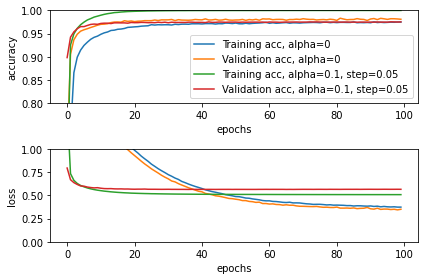

In [0]:
f, axs = plt.subplots(2,1)
axs[0].plot(history_0.history['accuracy'], label="Training acc, alpha=0")
axs[0].plot(history_0.history['val_accuracy'], label="Validation acc, alpha=0")
axs[0].plot(history_0_01_0_05.history['accuracy'], label="Training acc, alpha=0.1, step=0.05")
axs[0].plot(history_0_01_0_05.history['val_accuracy'], label="Validation acc, alpha=0.1, step=0.05")
axs[0].legend()
axs[0].set_xlabel('epochs')
axs[0].set_ylabel('accuracy')
axs[0].set_ylim(0.8,1)
axs[1].plot(history_0.history['loss'], label="Training loss, alpha=0")
axs[1].plot(history_0.history['val_loss'], label="Validation loss, alpha=0")
axs[1].plot(history_0_01_0_05.history['loss'], label="Training loss, alpha=0.1, step=0.05")
axs[1].plot(history_0_01_0_05.history['val_loss'], label="Validation loss, alpha=0.1, step=0.05")
# axs[1].legend(loc='upper right',ncol=2)
axs[1].set_xlabel('epochs')
axs[1].set_ylabel('loss')
axs[1].set_ylim(0,1)
plt.tight_layout()

In [0]:
f, axs = plt.subplots(1,2)
axs[0].plot(history_1.history['accuracy'], label="Training acc")
axs[0].plot(history_1.history['val_accuracy'], label="Validation acc")
axs[0].legend()
axs[0].set_xlabel('epochs')
axs[0].set_ylabel('accuracy')
axs[1].plot(history_1.history['loss'], label="Training loss")
axs[1].plot(history_1.history['val_loss'], label="Validation loss")
axs[1].legend()
axs[1].set_xlabel('epochs')
axs[1].set_ylabel('loss')
plt.tight_layout()